In [92]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [93]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [94]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df['Yearday'] = df['Date'].dt.dayofyear
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index','Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday,Yearday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2,305
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2,305
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2,305
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2,305
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2,305


In [95]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]
df1 = df.copy(deep=True)
better = df1.TLCompany.unique()
bet_dict = dict(zip(better, range(len(better))))
df1 = df1.replace({'TLCompany': bet_dict})
df1 = df1.replace({'BLCompany': bet_dict})
#try betting dummification
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,5,0,4,1,4,2006,11,44,2,305,4.75,9
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,7,1,7,1,4,2006,11,44,2,305,7.00,10
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,5,2,4,3,4,2006,11,44,2,305,4.75,-1
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,-1,1,-2,2,4,2006,11,44,2,305,-1.25,15
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,6,2,6,2,4,2006,11,44,2,305,6.00,3


In [96]:
df2 = df1[(df1['HomeTeam'] == 'GSW') | (df1['AwayTeam'] == 'GSW')]
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,GSW,LAL,0.0,1.0,0.0,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.00,-12
22,GSW,POR,1.0,1.0,0.5,1.0,1.0,0.500,9,3,9,3,4,2006,11,44,4,307,9.00,13
29,UTA,GSW,3.0,0.0,1.0,1.0,2.0,0.333,6,2,6,2,4,2006,11,44,5,308,6.00,24
40,DAL,GSW,0.0,3.0,0.0,2.0,2.0,0.500,10,2,9,1,4,2006,11,45,0,310,9.25,-3
49,NOK,GSW,4.0,0.0,1.0,2.0,3.0,0.400,7,1,7,1,4,2006,11,45,1,311,7.00,4


In [97]:
team = df2.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df2 = df2.replace({'HomeTeam': team_dict})
df2 = df2.replace({'AwayTeam': team_dict})
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,WinMargin
9,0,16,0.0,1.0,0.0,2.0,0.0,1.000,7,2,7,2,4,2006,11,44,2,305,7.00,-12
22,0,28,1.0,1.0,0.5,1.0,1.0,0.500,9,3,9,3,4,2006,11,44,4,307,9.00,13
29,1,0,3.0,0.0,1.0,1.0,2.0,0.333,6,2,6,2,4,2006,11,44,5,308,6.00,24
40,2,0,0.0,3.0,0.0,2.0,2.0,0.500,10,2,9,1,4,2006,11,45,0,310,9.25,-3
49,3,0,4.0,0.0,1.0,2.0,3.0,0.400,7,1,7,1,4,2006,11,45,1,311,7.00,4


In [98]:
print (len(df2))
df2['AwayTeam'] = pd.to_numeric(df2['AwayTeam'], errors='coerce')
df2 = df2.dropna()
print (len(df2))

1044
1044


In [99]:
#Look if team is marked as 0 or 1

df2.loc[df2['HomeTeam'] == 0, 'HomeCourt'] = 1
df2.loc[df2['HomeTeam'] != 0, 'HomeCourt'] = 0
df2['Opponent'] = df2['HomeTeam'] + df2['AwayTeam'] - 0
df2.loc[df2['HomeCourt'] == 1, 'OppWin'] = df2['ATWin']
df2.loc[df2['HomeCourt'] != 1, 'OppWin'] = df2['HTWin']
df2.loc[df2['HomeCourt'] == 1, 'Win'] = df2['HTWin']
df2.loc[df2['HomeCourt'] != 1, 'Win'] = df2['ATWin']
df2.loc[df2['HomeCourt'] == 1, 'OppLoss'] = df2['ATLoss']
df2.loc[df2['HomeCourt'] != 1, 'OppLoss'] = df2['HTLoss']
df2.loc[df2['HomeCourt'] == 1, 'Loss'] = df2['HTLoss']
df2.loc[df2['HomeCourt'] != 1, 'Loss'] = df2['ATLoss']
df2.loc[df2['HomeCourt'] == 1, 'Opp%'] = df2['AT%']
df2.loc[df2['HomeCourt'] != 1, 'Opp%'] = df2['HT%']
df2.loc[df2['HomeCourt'] == 1, 'Own%'] = df2['HT%']
df2.loc[df2['HomeCourt'] != 1, 'Own%'] = df2['AT%']
df2.loc[df2['HomeCourt'] == 1, 'average'] = df2['average']
df2.loc[df2['HomeCourt'] != 1, 'average'] = -1*df2['average']
df2.loc[df2['HomeCourt'] == 1, 'WinMargin'] = df2['WinMargin']
df2.loc[df2['HomeCourt'] != 1, 'WinMargin'] = -1*df2['WinMargin']

df2.loc[df2['WinMargin'] < 0, 'OppWin'] = df2['OppWin']-1
df2.loc[df2['WinMargin'] >= 0, 'OppLoss'] = df2['OppLoss']-1
df2.loc[df2['WinMargin'] < 0, 'Loss'] = df2['Loss']-1
df2.loc[df2['WinMargin'] >= 0, 'Win'] = df2['Win']-1
df2['Opp%'] = df2['OppWin']/(df2['OppWin'] + df2['OppLoss'])
df2['Own%'] = df2['Win']/(df2['Win'] + df2['Loss'])

df2 = df2.drop(['HomeTeam','AwayTeam','HTWin','HTLoss','HT%','ATWin','ATLoss','AT%'], axis=1)

In [100]:
df2 = df2.fillna(0)
#df2['Rest'] = df2['Yearday'].diff()%365
#df2['PrevMargin'] = df2['WinMargin'].shift(1)
#df2 = df2[df2['Rest'] < 20]
#df = df.drop(['Yearday'], axis=1)
df2 = df2.dropna()
cols_at_end = ['WinMargin']
df2 = df2[[c for c in df2 if c not in cols_at_end] + [c for c in cols_at_end if c in df2]]
df2.head()

,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,HomeCourt,Opponent,OppWin,Win,OppLoss,Loss,Opp%,Own%,WinMargin
9,7,2,7,2,4,2006,11,44,2,305,7.00,1.0,16,1.0,0.0,0.0,0.0,1.0,0.000000,-12
22,9,3,9,3,4,2006,11,44,4,307,9.00,1.0,28,1.0,0.0,0.0,1.0,1.0,0.000000,13
29,6,2,6,2,4,2006,11,44,5,308,-6.00,0.0,1,2.0,1.0,0.0,1.0,1.0,0.500000,-24
40,10,2,9,1,4,2006,11,45,0,310,-9.25,0.0,2,0.0,1.0,2.0,2.0,0.0,0.333333,3
49,7,1,7,1,4,2006,11,45,1,311,-7.00,0.0,3,3.0,2.0,0.0,2.0,1.0,0.500000,-4


In [101]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns.values
cols = np.delete(cols,np.where(cols=='average'))
cols

array(['TopLine', 'TLCompany', 'BotLine', 'BLCompany', 'NumComps', 'Year',
       'Month', 'Week', 'Weekday', 'Yearday', 'HomeCourt', 'Opponent',
       'OppWin', 'Win', 'OppLoss', 'Loss', 'Opp%', 'Own%', 'WinMargin'],
      dtype=object)

In [102]:
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)
sc2 = StandardScaler()
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
sc3 = StandardScaler()
df2[['average']] = sc3.fit_transform(df2[['average']])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,Yearday,average,HomeCourt,Opponent,OppWin,Win,OppLoss,Loss,Opp%,Own%,WinMargin
0,0.445730,-0.339009,0.534635,-0.401175,-2.847639,-1.820956,1.27878,1.169285,-0.489923,1.166256,0.552808,0.990467,0.094185,-1.206934,-1.269524,-1.297090,-1.111071,2.424173,-2.439948,-1.026261
1,0.710354,0.110135,0.794910,0.084703,-2.847639,-1.820956,1.27878,1.169285,0.524917,1.181653,0.810723,0.990467,1.403780,-1.206934,-1.269524,-1.297090,-1.036133,2.424173,-2.439948,0.661541
2,0.313417,-0.339009,0.404498,-0.401175,-2.847639,-1.820956,1.27878,1.169285,1.032338,1.189352,-1.123644,-1.009625,-1.542810,-1.138192,-1.211457,-1.297090,-1.036133,2.424173,-0.371498,-1.836406
3,0.842666,-0.339009,0.794910,-0.887054,-2.847639,-1.820956,1.27878,1.223209,-1.504763,1.204749,-1.542757,-1.009625,-1.433677,-1.275675,-1.211457,-1.154208,-0.961196,-2.216601,-1.060982,-0.013580
4,0.445730,-0.788153,0.534635,-0.887054,-2.847639,-1.820956,1.27878,1.223209,-0.997343,1.212448,-1.252602,-1.009625,-1.324544,-1.069450,-1.153389,-1.297090,-0.961196,2.424173,-0.371498,-0.486165


In [103]:
df3 = df2.copy(deep=True)
#df3 = df3.drop(['Year'], axis=1)

In [104]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [19], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [19], axis=1)
test_x=tests[0]
test_y=tests[1]

In [105]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [106]:
train_y.head()

,WinMargin
0,-1.026261
1,0.661541
2,-1.836406
3,-0.013580
4,-0.486165


## Correlation Marix

AxesSubplot(0.127273,0.125;0.617727x0.755)


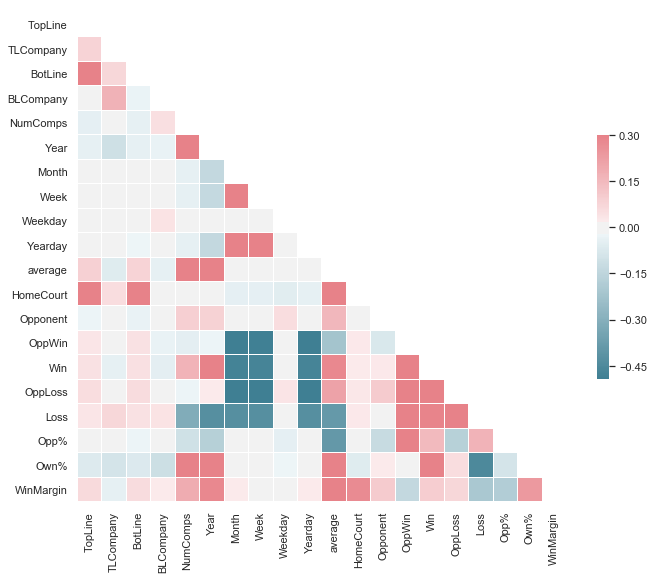

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([[ 0.04716362, -0.03714312, -0.05886637,  0.03592215, -0.06788353,
         0.19018829, -0.10611625, -0.26024168, -0.01784526,  0.38166414,
         0.546634  ,  0.02643095,  0.02494675, -0.03024581, -0.02346963,
        -0.04747263,  0.07966297,  0.0442361 , -0.06621998]])

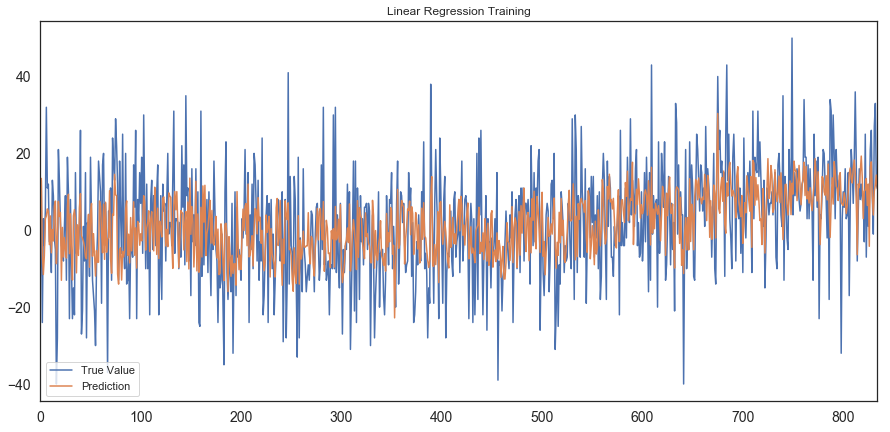

adj train r^2 = 0.27806764932360895
train mse = 144.19243719450103


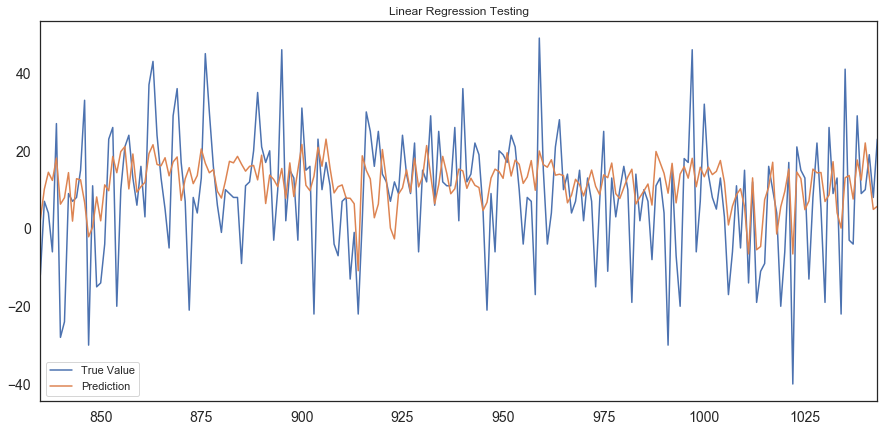

adj test r^2 = 0.16087323107730722
test mse = 197.6754736600446


In [109]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [112]:
from sklearn.metrics import accuracy_score
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 58.32%
The testing accuracy is 51.67%


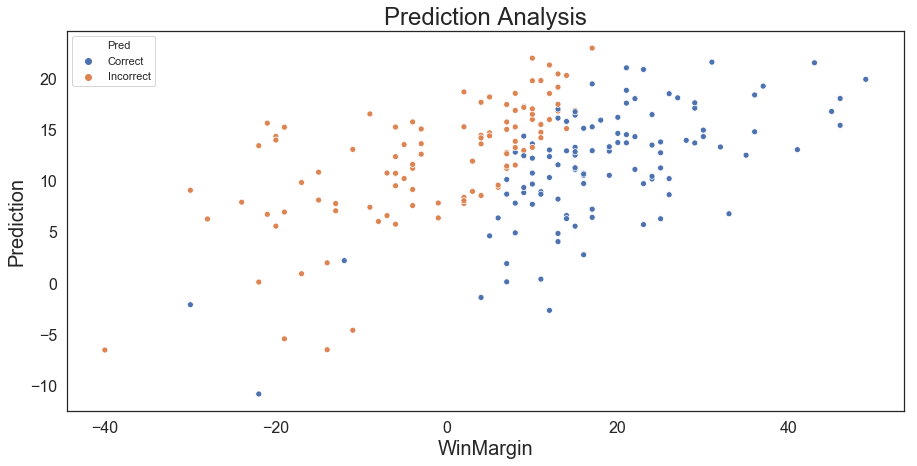

The testing accuracy is 51.67%


In [114]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## Naive Model

In [115]:
one = (len(train_y3[train_y3['Over']>.5]) + len(test_y3[test_y3['Over']>.5])) / (len(train_y3) + len(test_y3)) * 100
zero = (len(train_y3[train_y3['Over']<.5]) + len(test_y3[test_y3['Over']<.5])) / (len(train_y3) + len(test_y3)) * 100

In [116]:
print('Always picking over the line works ' + str(round(one,2)) + '% of the time')
print('Always picking under the line works ' + str(round(zero,2)) + '% of the time')

Always picking over the line works 51.82% of the time
Always picking under the line works 48.18% of the time


## Extra Trees

In [117]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

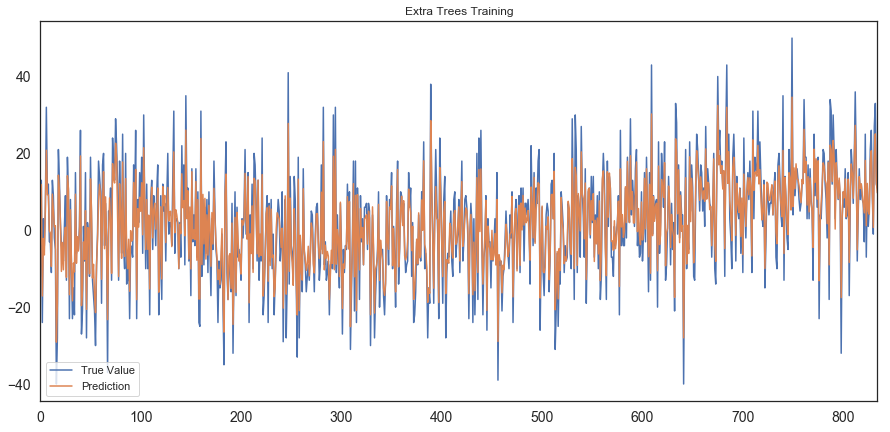

adj train r^2 = 0.8903158850959665
train mse = 21.90734330538916


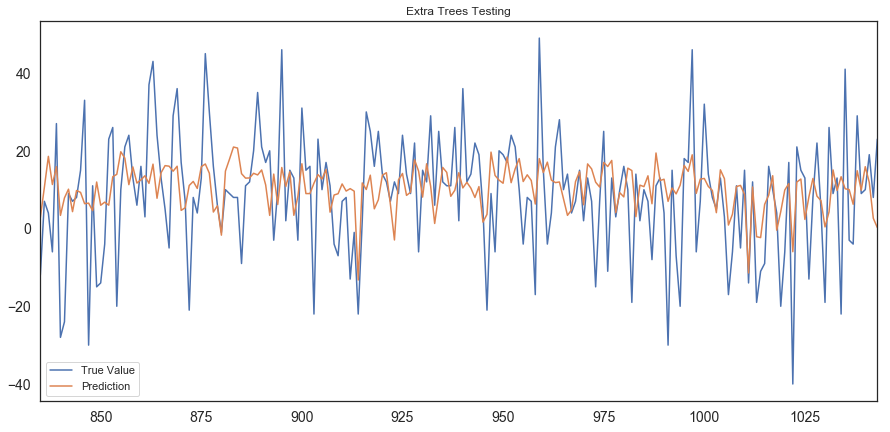

adj test r^2 = 0.109253981301206
test mse = 209.8355667799043


In [118]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [119]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 95.33%
The testing accuracy is 49.76%


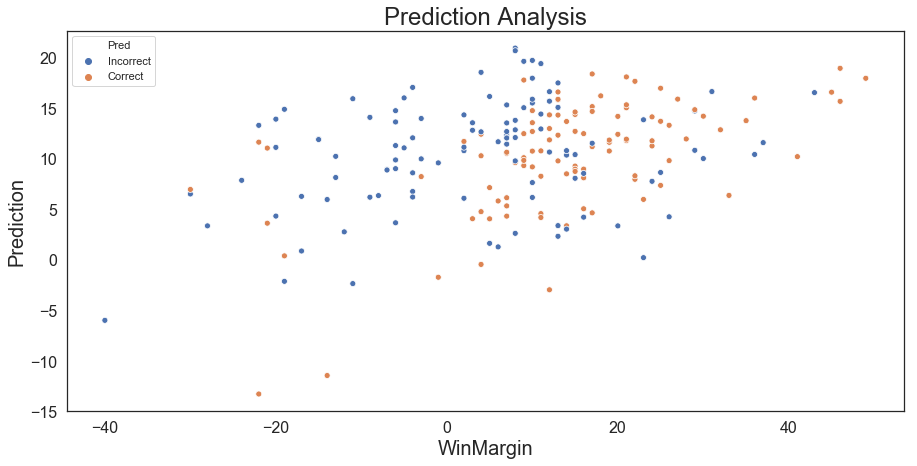

The testing accuracy is 49.76%


In [120]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## Random Forrest

In [121]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.WinMargin.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

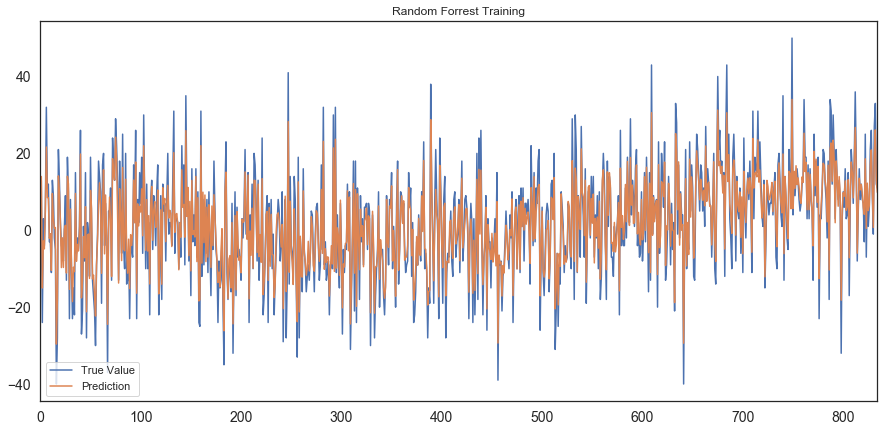

adj train r^2 = 0.8891338237511944
train mse = 22.14343787305384


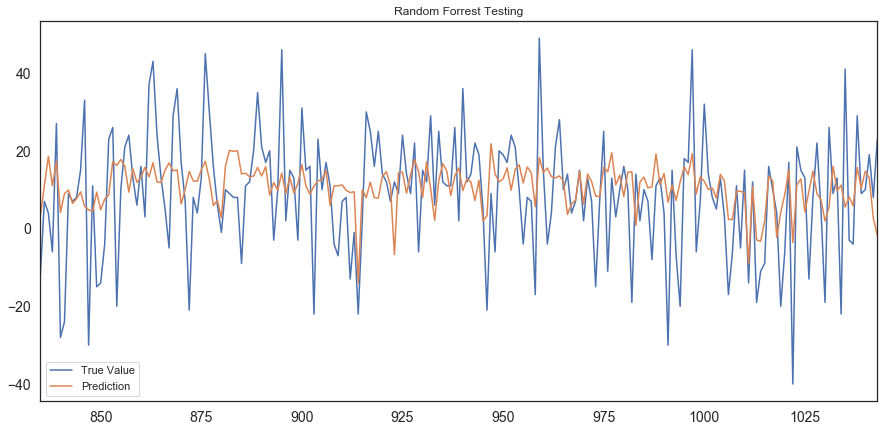

adj test r^2 = 0.11196856121491305
test mse = 209.19608548803825


In [122]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [123]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 95.45%
The testing accuracy is 48.8%


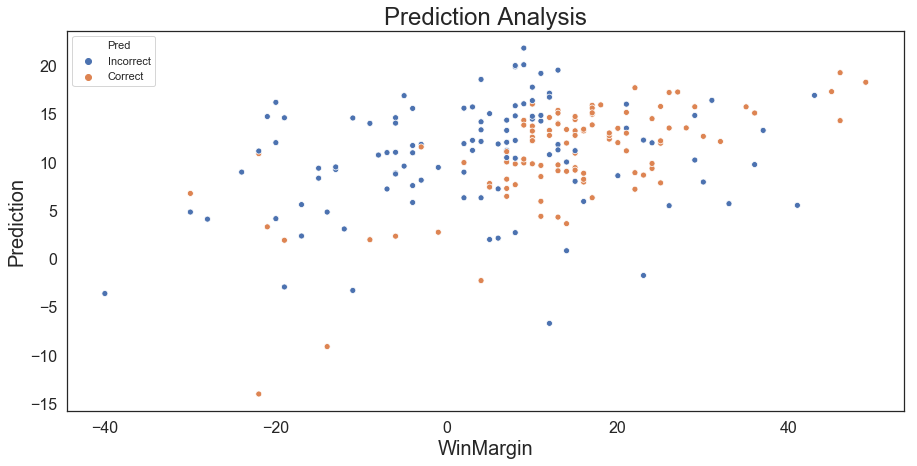

The testing accuracy is 48.8%


In [124]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## XGBoost

In [125]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [126]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.003)
reg.fit(train_x.values, train_y.WinMargin.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.003, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

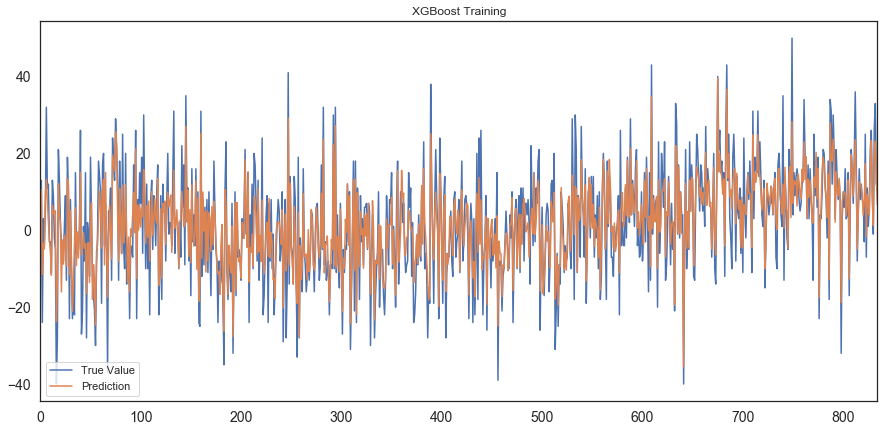

adj train r^2 = 0.7789586089342211
train mse = 44.14886916866319


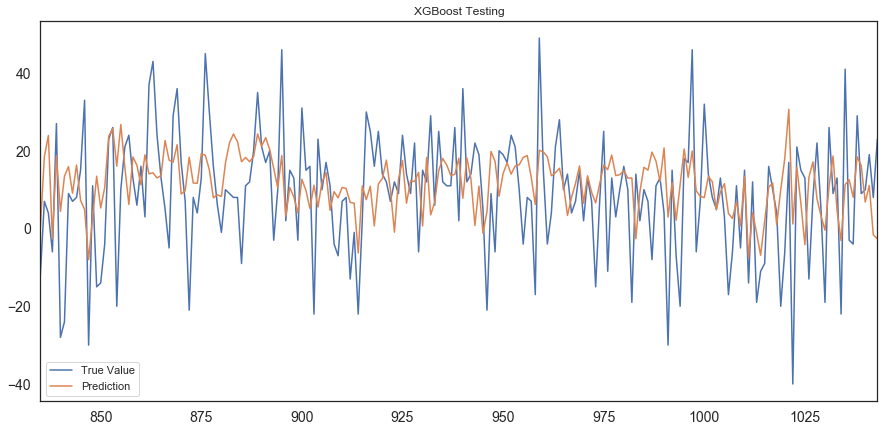

adj test r^2 = 0.059779371188638186
test mse = 221.49044104962132


In [127]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [128]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 86.23%
The testing accuracy is 51.67%


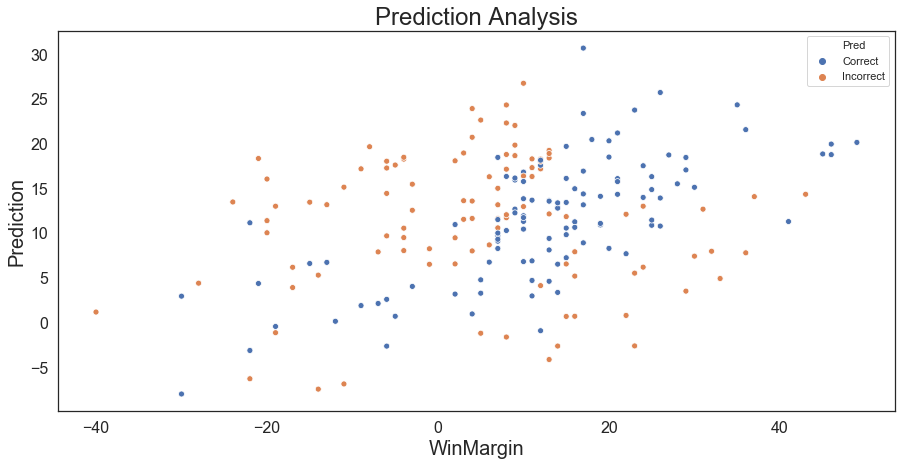

The testing accuracy is 51.67%


In [129]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## Feed Forward Neural Network

In [130]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [131]:
K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=19, activation='relu', ))
Dropout(.3)
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.WinMargin.values.ravel(), validation_data=[test_x.values, test_y['WinMargin'].values.ravel()], epochs=100,verbose=1,shuffle=False)

Train on 835 samples, validate on 209 samples
Epoch 1/100
835/835 [==============================] - 1s 982us/step - loss: 0.9980 - val_loss: 1.1313
Epoch 2/100
835/835 [==============================] - 0s 63us/step - loss: 0.7722 - val_loss: 0.9917
Epoch 3/100
835/835 [==============================] - 0s 61us/step - loss: 0.7218 - val_loss: 0.9623
Epoch 4/100
835/835 [==============================] - 0s 59us/step - loss: 0.6945 - val_loss: 0.9542
Epoch 5/100
835/835 [==============================] - 0s 58us/step - loss: 0.6756 - val_loss: 0.9553
Epoch 6/100
835/835 [==============================] - 0s 59us/step - loss: 0.6608 - val_loss: 0.9571
Epoch 7/100
835/835 [==============================] - 0s 62us/step - loss: 0.6485 - val_loss: 0.9586
Epoch 8/100
835/835 [==============================] - 0s 61us/step - loss: 0.6377 - val_loss: 0.9609
Epoch 9/100
835/835 [==============================] - 0s 62us/step - loss: 0.6286 - val_loss: 0.9645
Epoch 10/100
835/835 [=============

835/835 [==============================] - 0s 61us/step - loss: 0.4381 - val_loss: 1.1147
Epoch 81/100
835/835 [==============================] - 0s 63us/step - loss: 0.4360 - val_loss: 1.1203
Epoch 82/100
835/835 [==============================] - 0s 63us/step - loss: 0.4347 - val_loss: 1.1204
Epoch 83/100
835/835 [==============================] - 0s 54us/step - loss: 0.4329 - val_loss: 1.1245
Epoch 84/100
835/835 [==============================] - 0s 59us/step - loss: 0.4319 - val_loss: 1.1264
Epoch 85/100
835/835 [==============================] - 0s 54us/step - loss: 0.4307 - val_loss: 1.1267
Epoch 86/100
835/835 [==============================] - 0s 54us/step - loss: 0.4307 - val_loss: 1.1317
Epoch 87/100
835/835 [==============================] - 0s 64us/step - loss: 0.4300 - val_loss: 1.1298
Epoch 88/100
835/835 [==============================] - 0s 63us/step - loss: 0.4312 - val_loss: 1.1386
Epoch 89/100
835/835 [==============================] - 0s 61us/step - loss: 0.4316 - 

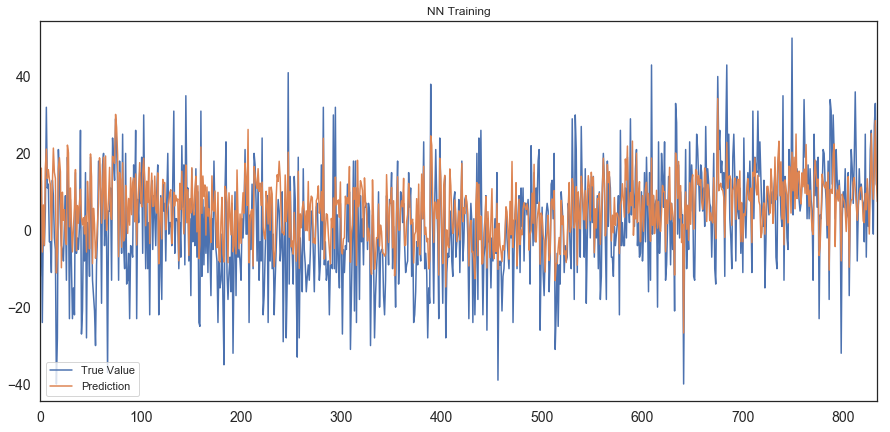

adj train r^2 = 0.42187068971269437
train mse = 115.47047889708683


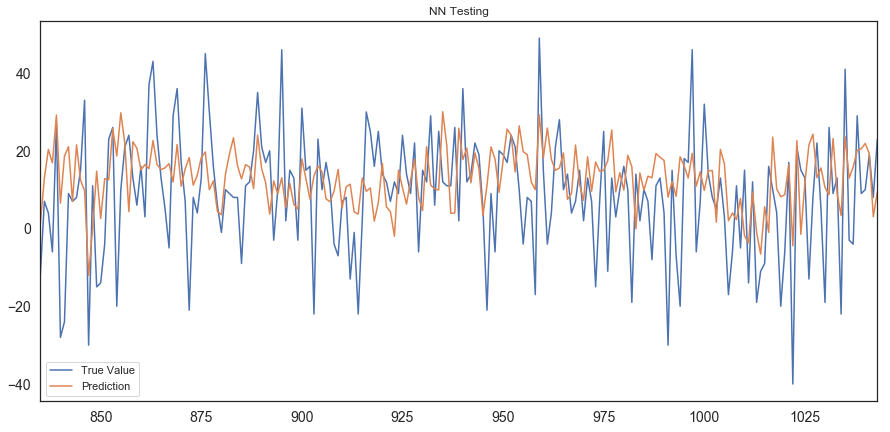

adj test r^2 = -0.041333845748510845
test mse = 245.3099684340268


In [132]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [133]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 64.79%
The testing accuracy is 46.41%


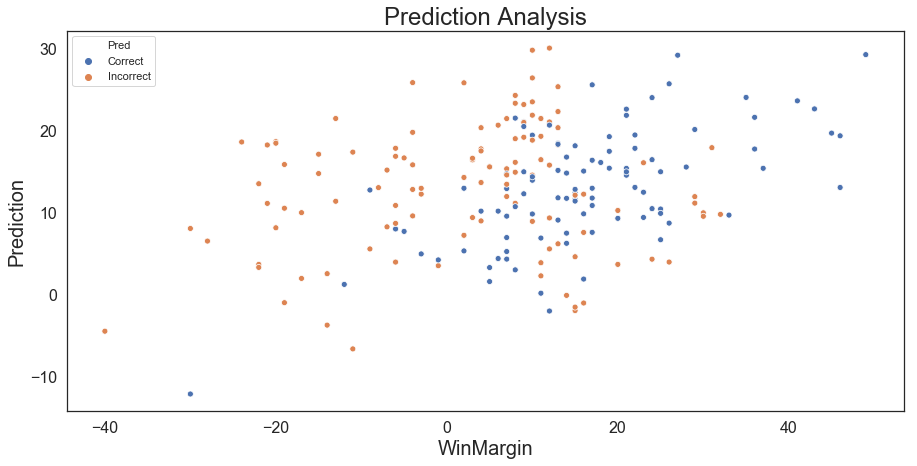

The testing accuracy is 46.41%


In [134]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## LSTM

In [135]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [136]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.WinMargin.values.ravel(), validation_data=[X_tst_t, test_y['WinMargin'].values.ravel()], epochs=10, verbose=1, shuffle=False)

Train on 835 samples, validate on 209 samples
Epoch 1/10
835/835 [==============================] - 5s 6ms/step - loss: 0.8631 - val_loss: 0.9694
Epoch 2/10
835/835 [==============================] - 2s 3ms/step - loss: 0.7674 - val_loss: 0.9386
Epoch 3/10
835/835 [==============================] - 3s 3ms/step - loss: 0.6954 - val_loss: 1.0186
Epoch 4/10
835/835 [==============================] - 3s 3ms/step - loss: 0.6752 - val_loss: 0.9490
Epoch 5/10
835/835 [==============================] - 2s 3ms/step - loss: 0.6665 - val_loss: 1.0446
Epoch 6/10
835/835 [==============================] - 3s 4ms/step - loss: 0.6535 - val_loss: 0.9740
Epoch 7/10
835/835 [==============================] - 3s 3ms/step - loss: 0.6455 - val_loss: 1.0520
Epoch 8/10
835/835 [==============================] - 3s 3ms/step - loss: 0.6281 - val_loss: 1.0066
Epoch 9/10
835/835 [==============================] - 3s 3ms/step - loss: 0.6219 - val_loss: 1.0479
Epoch 10/10
835/835 [==============================] -

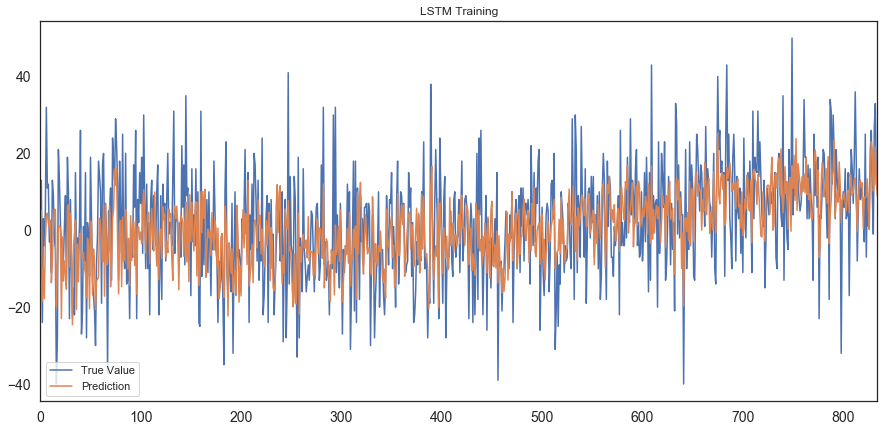

adj train r^2 = 0.3448229830090247
train mse = 130.85931221289593


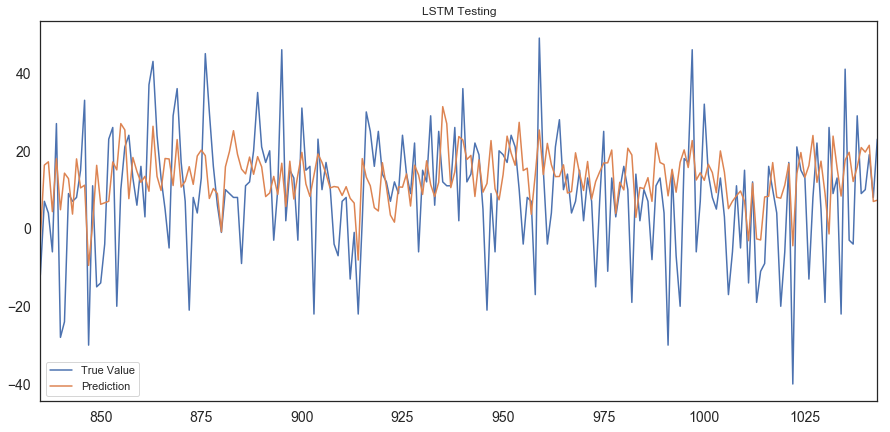

adj test r^2 = 0.025287064536706483
test mse = 229.61589158649517


In [137]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [138]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 59.88%
The testing accuracy is 46.89%


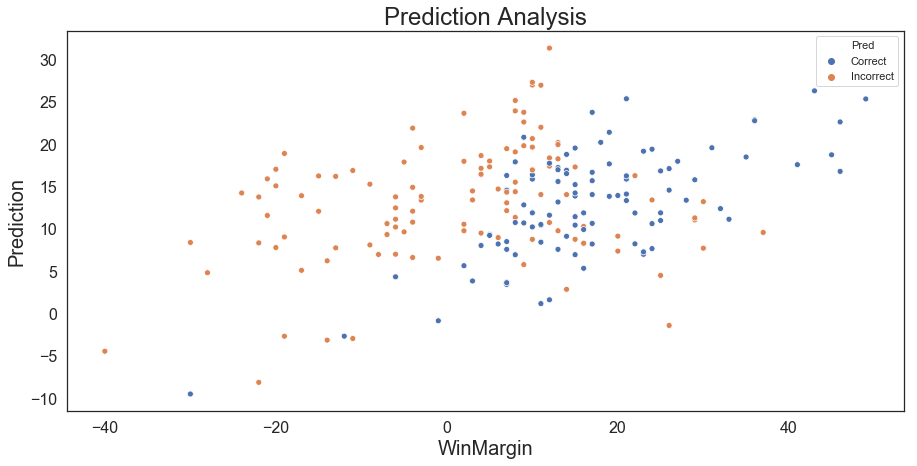

The testing accuracy is 46.89%


In [139]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

## TPOT

In [144]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(population_size=10, max_time_mins=10, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.WinMargin.values.ravel())


10.009875366666668 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LinearSVR(StandardScaler(MinMaxScaler(RBFSampler(LassoLarsCV(SelectPercentile(input_matrix, percentile=4), normalize=False), gamma=0.05))), C=1.0, dual=True, epsilon=0.01, loss=squared_epsilon_insensitive, tol=0.001)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=10, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

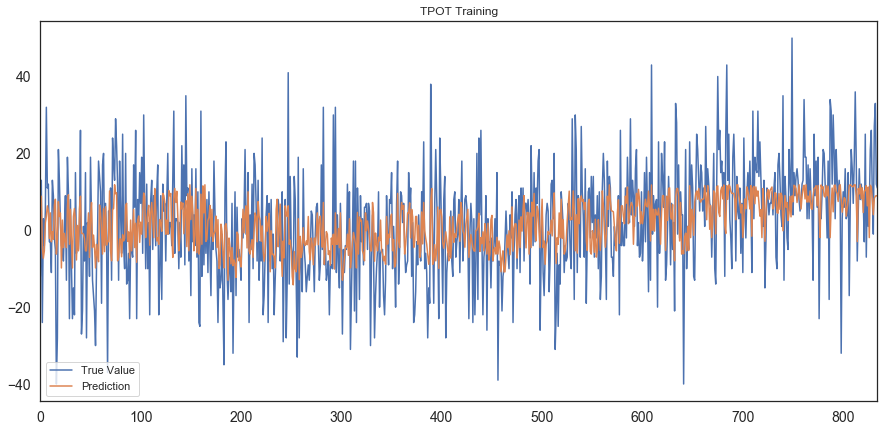

adj train r^2 = 0.25582918244391106
train mse = 148.6341535628678


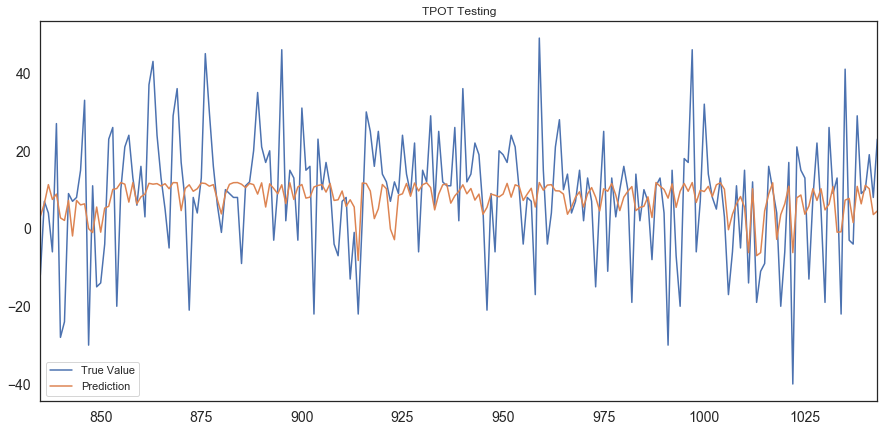

adj test r^2 = 0.15091117787271835
test mse = 200.0222627970088


In [145]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [148]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 51.14%
The testing accuracy is 49.76%


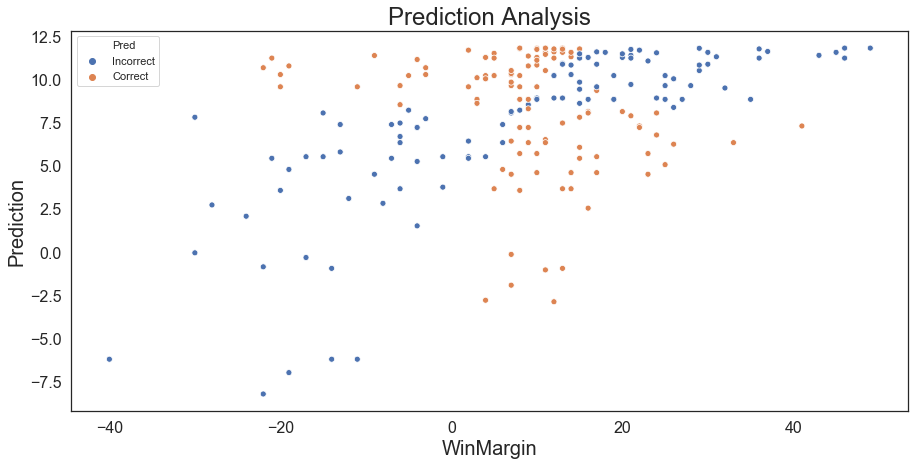

The testing accuracy is 49.76%


In [149]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="WinMargin", y="prediction", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("WinMargin",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')